In [2]:
# mengimport semua libraries and dependencies dari Dataframe

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings("ignore")

from datetime import datetime, timedelta

In [3]:
# mengimport semua libraries and dependencies untuk visualisasi data

pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

In [4]:
# mengimport semua libraries and dependencies untuk machine learning

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [5]:
# mengimport Dataset

data = pd.read_csv ("Bank Customer Churn Dataset.csv")

In [6]:
# menampilkan awal dataset
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1
1,15647311,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0
2,15619304,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1
3,15701354,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0
4,15737888,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0


In [7]:
# menampilkan akhir dataset

data.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.0000,2,1,0,96270.6400,0
9996,15569892,516,France,Male,35,10,57369.6100,1,1,1,101699.7700,0
9997,15584532,709,France,Female,36,7,0.0000,1,0,1,42085.5800,1
9998,15682355,772,Germany,Male,42,3,75075.3100,2,1,0,92888.5200,1
9999,15628319,792,France,Female,28,4,130142.7900,1,1,0,38190.7800,0


In [8]:
# menampilkan jumlah kolom baris dataset

data.shape

(10000, 12)

In [9]:
# menampilkan kolom dataset

data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [10]:
# menampilkan info dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [11]:
# menampilkan deskripsi dari dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0000,15690940.5694,71936.1861,15565701.0000,15628528.2500,15690738.0000,15753233.7500,15815690.0000
credit_score,10000.0000,650.5288,96.6533,350.0000,584.0000,652.0000,718.0000,850.0000
age,10000.0000,38.9218,10.4878,18.0000,32.0000,37.0000,44.0000,92.0000
tenure,10000.0000,5.0128,2.8922,0.0000,3.0000,5.0000,7.0000,10.0000
balance,10000.0000,76485.8893,62397.4052,0.0000,0.0000,97198.5400,127644.2400,250898.0900
products_number,10000.0000,1.5302,0.5817,1.0000,1.0000,1.0000,2.0000,4.0000
credit_card,10000.0000,0.7055,0.4558,0.0000,0.0000,1.0000,1.0000,1.0000
active_member,10000.0000,0.5151,0.4998,0.0000,0.0000,1.0000,1.0000,1.0000
estimated_salary,10000.0000,100090.2399,57510.4928,11.5800,51002.1100,100193.9150,149388.2475,199992.4800
churn,10000.0000,0.2037,0.4028,0.0000,0.0000,0.0000,0.0000,1.0000


# Data Cleaning

In [12]:
# mendrop kolom yang berguna dari dataset 

data =data.drop(['customer_id'], axis = 1)

In [13]:
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1
1,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0
2,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1
3,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0
4,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0


In [14]:
# mengecek missing values

data.isna().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [15]:
# Pemisahan Variabel/Kolom Numerik dan Kategorik

cat_columns = data.select_dtypes(include=['object']).columns
num_columns = data.select_dtypes(exclude=['object']).columns
data_cat = data[cat_columns]
data_num = data[num_columns]

# Visualisasi Data

In [16]:
# Persentase dari customer churn

total_customers = len(data)
churned_count = data[data['churn'] == 1]['churn'].count()
not_churned_count = data[data['churn'] == 0]['churn'].count()
percentage_churned = (churned_count / total_customers) * 100
percentage_not_churned = (not_churned_count / total_customers) * 100

print(f"Percentage of customers who churned: {percentage_churned:.2f}%")
print(f"Percentage of customers who did not churn: {percentage_not_churned:.2f}%")

Percentage of customers who churned: 20.37%
Percentage of customers who did not churn: 79.63%


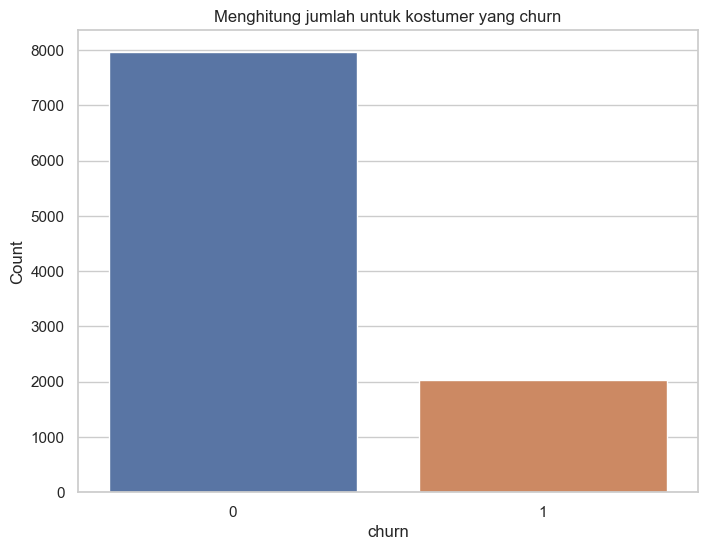

In [17]:
# memvisualisasikan data dengan Diagram Bar

sns.set(style="whitegrid")  

# Plotting Diagram Bar plot untuk kolom 'churn'
plt.figure(figsize=(8, 6))  
sns.countplot(data=data, x='churn')  
plt.title('Menghitung jumlah untuk kostumer yang churn')  
plt.xlabel('churn')  
plt.ylabel('Count')  
plt.show()  

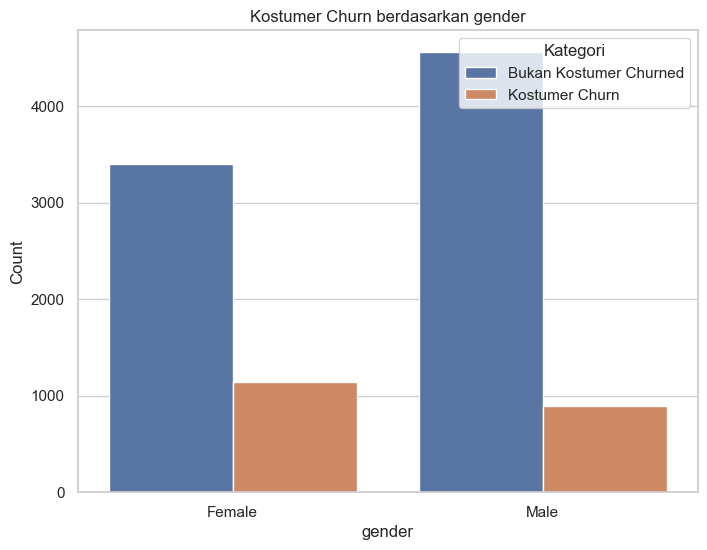

In [18]:
# Menampilkan visualisasi kostumer Churn berdasarkan gender

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='gender', hue='churn')
plt.title('Kostumer Churn berdasarkan gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.legend(title='Kategori', loc='upper right', labels=['Bukan Kostumer Churned', 'Kostumer Churn'])
plt.show()

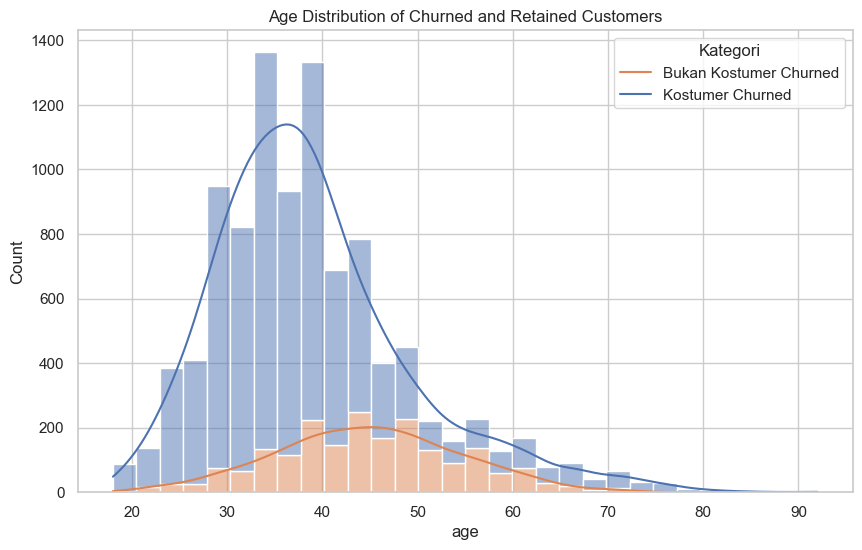

In [19]:
# Pendistribusian Usia Kostumer Churn dan tidak

plt.figure(figsize=(10, 6))
sns.histplot(data, x='age', hue='churn', multiple='stack', bins=30, kde=True)
plt.title('Age Distribution of Churned and Retained Customers')
plt.xlabel('age')
plt.ylabel('Count')
plt.legend(title='Kategori', loc='upper right', labels=['Bukan Kostumer Churned', 'Kostumer Churned'])
plt.show()

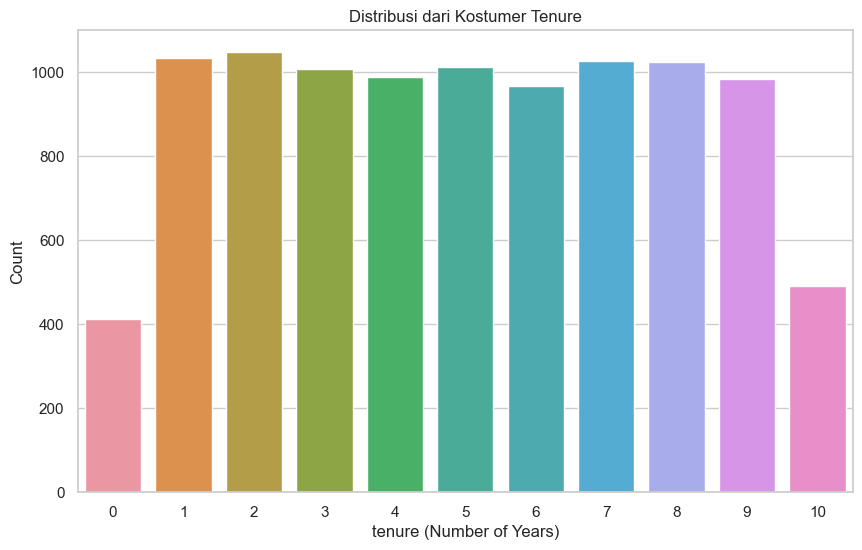

In [20]:
# Pendistribusian Kostumer Tenure

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='tenure')
plt.title('Distribusi dari Kostumer Tenure')
plt.xlabel('tenure (Number of Years)')
plt.ylabel('Count')
plt.show()

In [21]:
# Membuat data unik

data['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

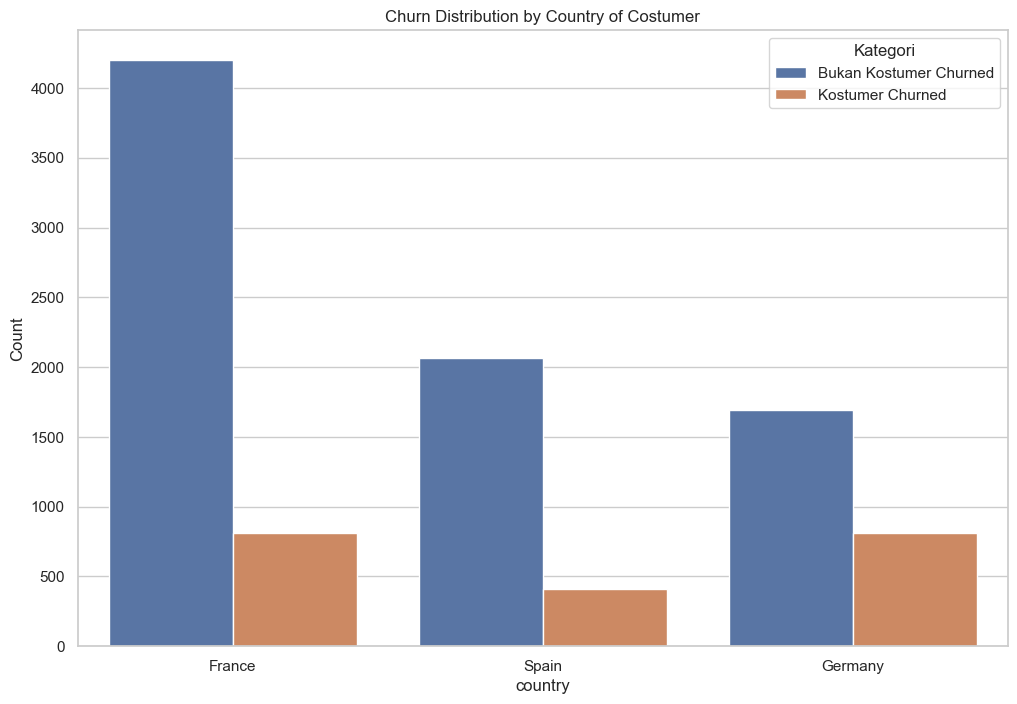

In [22]:
# Memvisualisasikan pendistribusian data unik

plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='country', hue='churn', order=['France', 'Spain', 'Germany'])
plt.title('Churn Distribution by Country of Costumer')
plt.xlabel('country')
plt.ylabel('Count')
plt.legend(title='Kategori', loc='upper right', labels=['Bukan Kostumer Churned', 'Kostumer Churned'])
plt.show() 

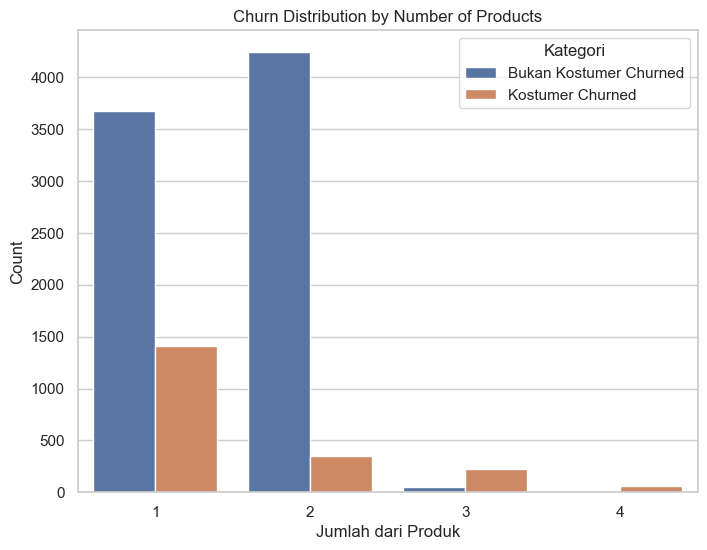

In [23]:
# Memvisualisasikan pendistribusian berdasarkan jumlah prodek

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='products_number', hue='churn')
plt.title('Churn Distribution by Number of Products')
plt.xlabel('Jumlah dari Produk')
plt.ylabel('Count')
plt.legend(title='Kategori', loc='upper right', labels=['Bukan Kostumer Churned', 'Kostumer Churned'])
plt.show()

In [24]:
# Menghitung persentase churn berdasarkan jumlah produk

churn_percentage_by_product_count = data.groupby('products_number')['churn'].mean() * 100

# Menampilkan persentase churn dari jumlah produk

print("Persentase Churn dari Jumlah Produk:")
print(churn_percentage_by_product_count)

Persentase Churn dari Jumlah Produk:
products_number
1    27.7144
2     7.5817
3    82.7068
4   100.0000
Name: churn, dtype: float64


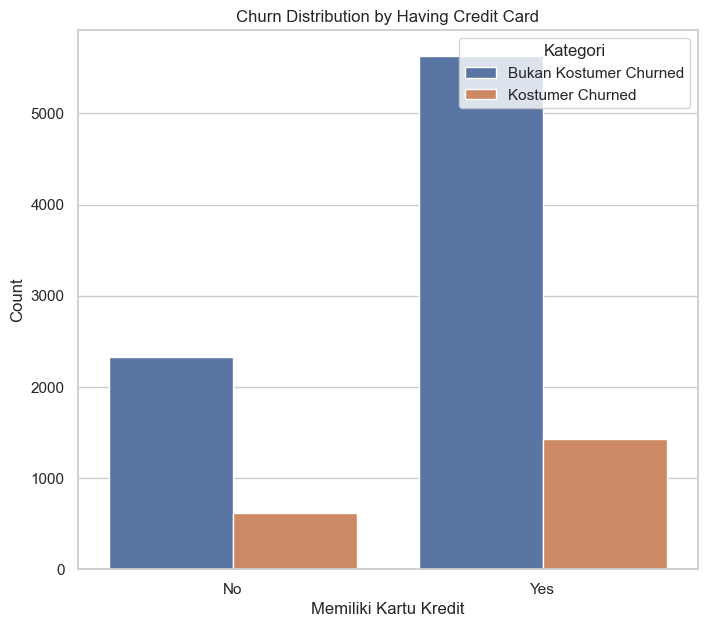

In [25]:
# Memvisualisasi pendistribusian Kostumer Churn dengan kepemilikikan Kartu Kredit

plt.figure(figsize=(8, 7))
sns.countplot(data=data, x='credit_card', hue='churn')
plt.title('Churn Distribution by Having Credit Card')
plt.xlabel('Memiliki Kartu Kredit')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes']) 

# Set x-axis labels as 'No' and 'Yes'
plt.legend(title='Kategori', loc='upper right', labels=['Bukan Kostumer Churned', 'Kostumer Churned'])
plt.show()

In [26]:
# Menghitung persentase churn berdasarkan kepemilikikan Kartu Kredit

churn_percentage_by_card = data.groupby('credit_card')['churn'].mean() * 100

# Menampilkan persentase churn dari jumlah produk

print("Persentase Churn dari Kostumer Churn dengan kepemilikikan Kartu Kredit:")
print(churn_percentage_by_card)

Persentase Churn dari Kostumer Churn dengan kepemilikikan Kartu Kredit:
credit_card
0   20.8149
1   20.1843
Name: churn, dtype: float64


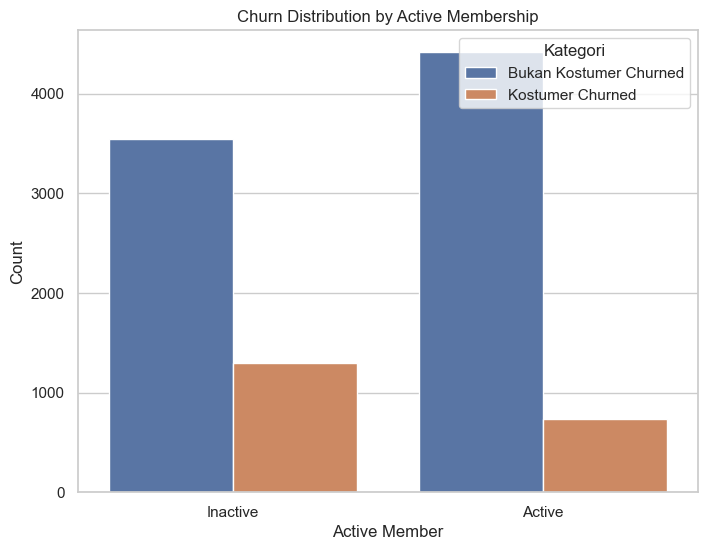

In [27]:
# Memvisualisasi pendistribusian berdasarkan Kostumer Aktif
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='active_member', hue='churn')
plt.title('Churn Distribution by Active Membership')
plt.xlabel('Active Member')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Inactive', 'Active']) 

# Set x-axis labels
plt.legend(title='Kategori', loc='upper right', labels=['Bukan Kostumer Churned', 'Kostumer Churned'])
plt.show()

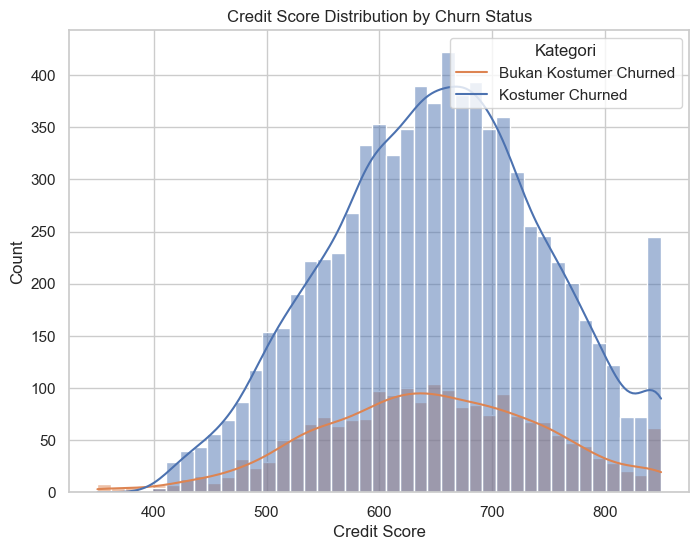

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(data, x='credit_score', hue='churn', kde=True)
plt.title('Credit Score Distribution by Churn Status')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.legend(title='Kategori', loc='upper right', labels=['Bukan Kostumer Churned', 'Kostumer Churned'])
plt.show()

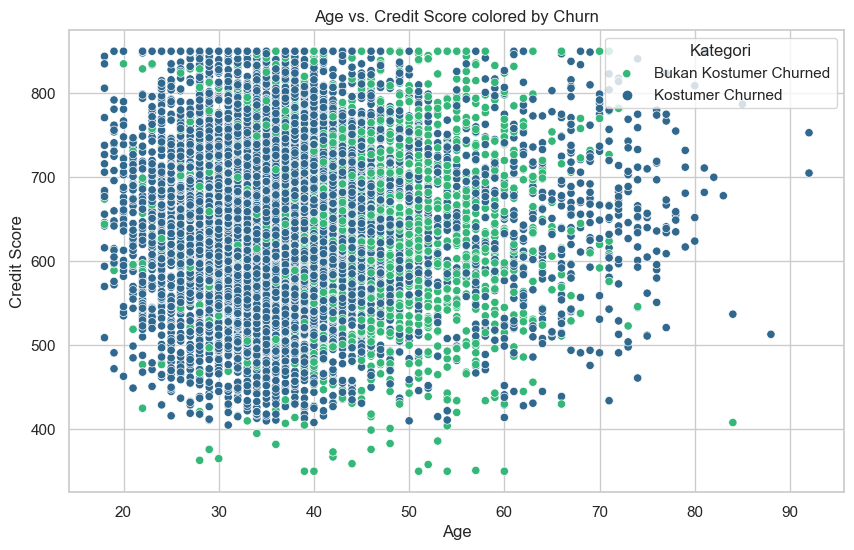

In [29]:
# Perbandingan Usia dan Credit Score dengan Churn

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='credit_score', hue='churn', palette='viridis')
plt.title('Age vs. Credit Score colored by Churn')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.legend(title='Kategori', loc='upper right', labels=['Bukan Kostumer Churned', 'Kostumer Churned'])
plt.show()

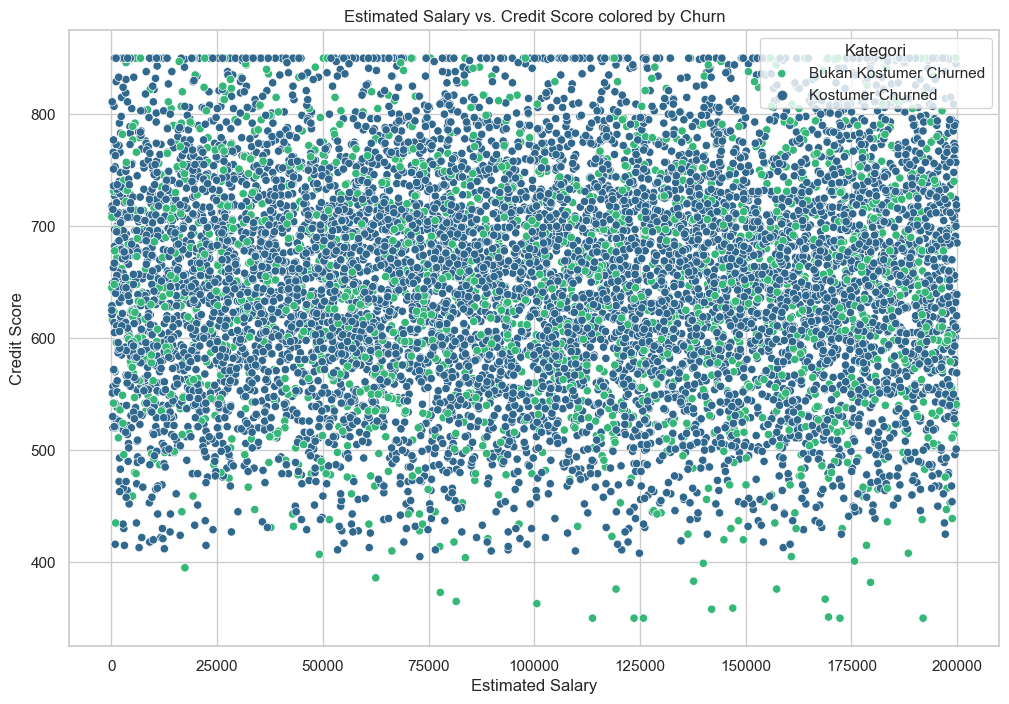

In [30]:
# Perbandingan Estimasi Gaji dan Credit Score dengan Churn

plt.figure(figsize=(12, 8))
sns.scatterplot(data, x='estimated_salary', y='credit_score', hue='churn', palette='viridis')
plt.title('Estimated Salary vs. Credit Score colored by Churn')
plt.xlabel('Estimated Salary')
plt.ylabel('Credit Score')
plt.legend(title='Kategori', loc='upper right', labels=['Bukan Kostumer Churned', 'Kostumer Churned'])
plt.show()

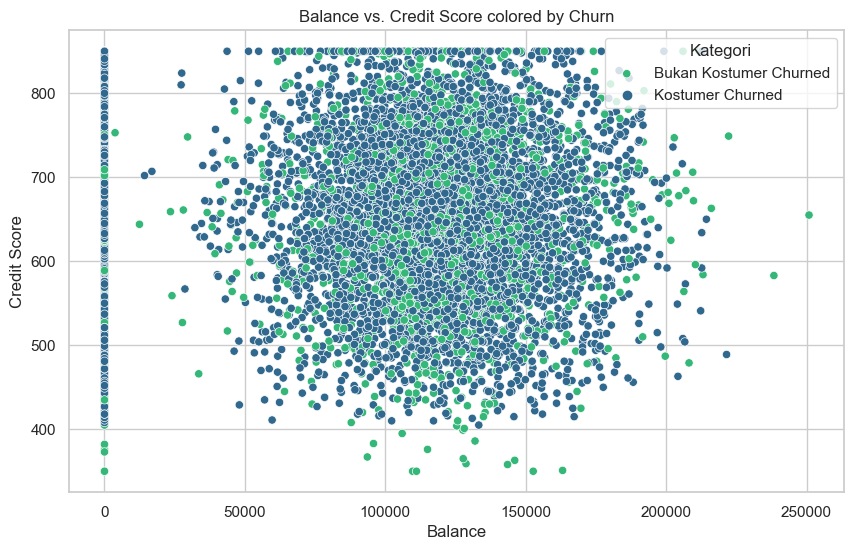

In [31]:
# Perbandingan Balance/ Tabungan dan Credit Score dengan Churn

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='balance', y='credit_score', hue='churn', palette='viridis')
plt.title('Balance vs. Credit Score colored by Churn')
plt.xlabel('Balance')
plt.ylabel('Credit Score')
plt.legend(title='Kategori', loc='upper right', labels=['Bukan Kostumer Churned', 'Kostumer Churned'])
plt.show()

# Data Preparation

In [39]:
cat_columns

Index(['country', 'gender'], dtype='object')

In [40]:
# Mendapatkan variabel dummy untuk fitur kategorikal dan simpan dalam variabel baru berupa - 'dummies'

dummies = pd.get_dummies(data[cat_columns], drop_first = True)
dummies.shape

(10000, 3)

In [41]:
# Menamabahkan hasil dari Datafame utama

data = pd.concat([data, dummies], axis = 1)

In [42]:
# Jatuhkan variabel cat/ category asli karena 'dummies' sudah dibuat

data.drop(cat_columns, axis = 1, inplace = True)
data.shape

(10000, 12)

In [43]:
data.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.0000,1,1,1,101348.8800,1,False,False,False
1,608,41,1,83807.8600,1,0,1,112542.5800,0,False,True,False
2,502,42,8,159660.8000,3,1,0,113931.5700,1,False,False,False
3,699,39,1,0.0000,2,0,0,93826.6300,0,False,False,False
4,850,43,2,125510.8200,1,1,1,79084.1000,0,False,True,False


In [45]:
# Rescaling features

from sklearn.preprocessing import StandardScaler

num_columns_list = num_columns.tolist()
num_columns_list.remove("churn")
num_columns = pd.Index(num_columns_list)
numerical_columns = num_columns

scaler = StandardScaler()
scaler.fit(data[numerical_columns])
data[numerical_columns] = scaler.transform(data[numerical_columns])

In [46]:
data.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,-0.3262,0.2935,-1.0418,-1.2258,-0.9116,0.6461,0.9702,0.0219,1,False,False,False
1,-0.4400,0.1982,-1.3875,0.1174,-0.9116,-1.5478,0.9702,0.2165,0,False,True,False
2,-1.5368,0.2935,1.0329,1.3331,2.5271,0.6461,-1.0307,0.2407,1,False,False,False
3,0.5015,0.0075,-1.3875,-1.2258,0.8077,-1.5478,-1.0307,-0.1089,0,False,False,False
4,2.0639,0.3889,-1.0418,0.7857,-0.9116,0.6461,0.9702,-0.3653,0,False,True,False


In [47]:
data.dtypes

credit_score        float64
age                 float64
tenure              float64
balance             float64
products_number     float64
credit_card         float64
active_member       float64
estimated_salary    float64
churn                 int64
country_Germany        bool
country_Spain          bool
gender_Male            bool
dtype: object

In [52]:
data['churn'].is_unique

False

In [53]:
# Membagi data untuk ke Training dan Testing Sets

# Features
X = data.drop('churn', axis=1)

# Target variable
y = data['churn']  

In [54]:
y.dtypes

dtype('int64')

In [55]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
X_train.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
9254,0.3670,-0.6600,0.3414,-1.2258,0.8077,0.6461,0.9702,1.3738,False,False,True
1561,-0.1917,0.2935,-0.3502,0.6914,0.8077,0.6461,0.9702,1.6674,True,False,True
1670,-0.9470,-1.4228,-0.6960,0.6131,-0.9116,0.6461,-1.0307,-0.2469,False,True,True
6087,-0.9263,-1.1368,1.3787,0.9480,-0.9116,0.6461,-1.0307,0.9214,False,False,False
6669,-1.3816,1.6285,1.3787,1.0524,-0.9116,-1.5478,-1.0307,-1.0538,False,False,True


In [57]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
credit_score,8000.0000,0.0116,0.9971,-3.1095,-0.6780,0.0256,0.7085,2.0639
age,8000.0000,-0.0023,1.0030,-1.9950,-0.6600,-0.1833,0.4842,5.0612
tenure,8000.0000,-0.0031,0.9965,-1.7333,-0.6960,-0.0044,0.6871,1.7245
balance,8000.0000,-0.0062,1.0011,-1.2258,-1.2258,0.3199,0.8194,2.7953
products_number,8000.0000,0.0020,0.9967,-0.9116,-0.9116,-0.9116,0.8077,4.2464
credit_card,8000.0000,-0.0044,1.0020,-1.5478,-1.5478,0.6461,0.6461,0.6461
active_member,8000.0000,-0.0047,1.0002,-1.0307,-1.0307,0.9702,0.9702,0.9702
estimated_salary,8000.0000,0.0059,1.0002,-1.7389,-0.8473,0.0069,0.8609,1.7368


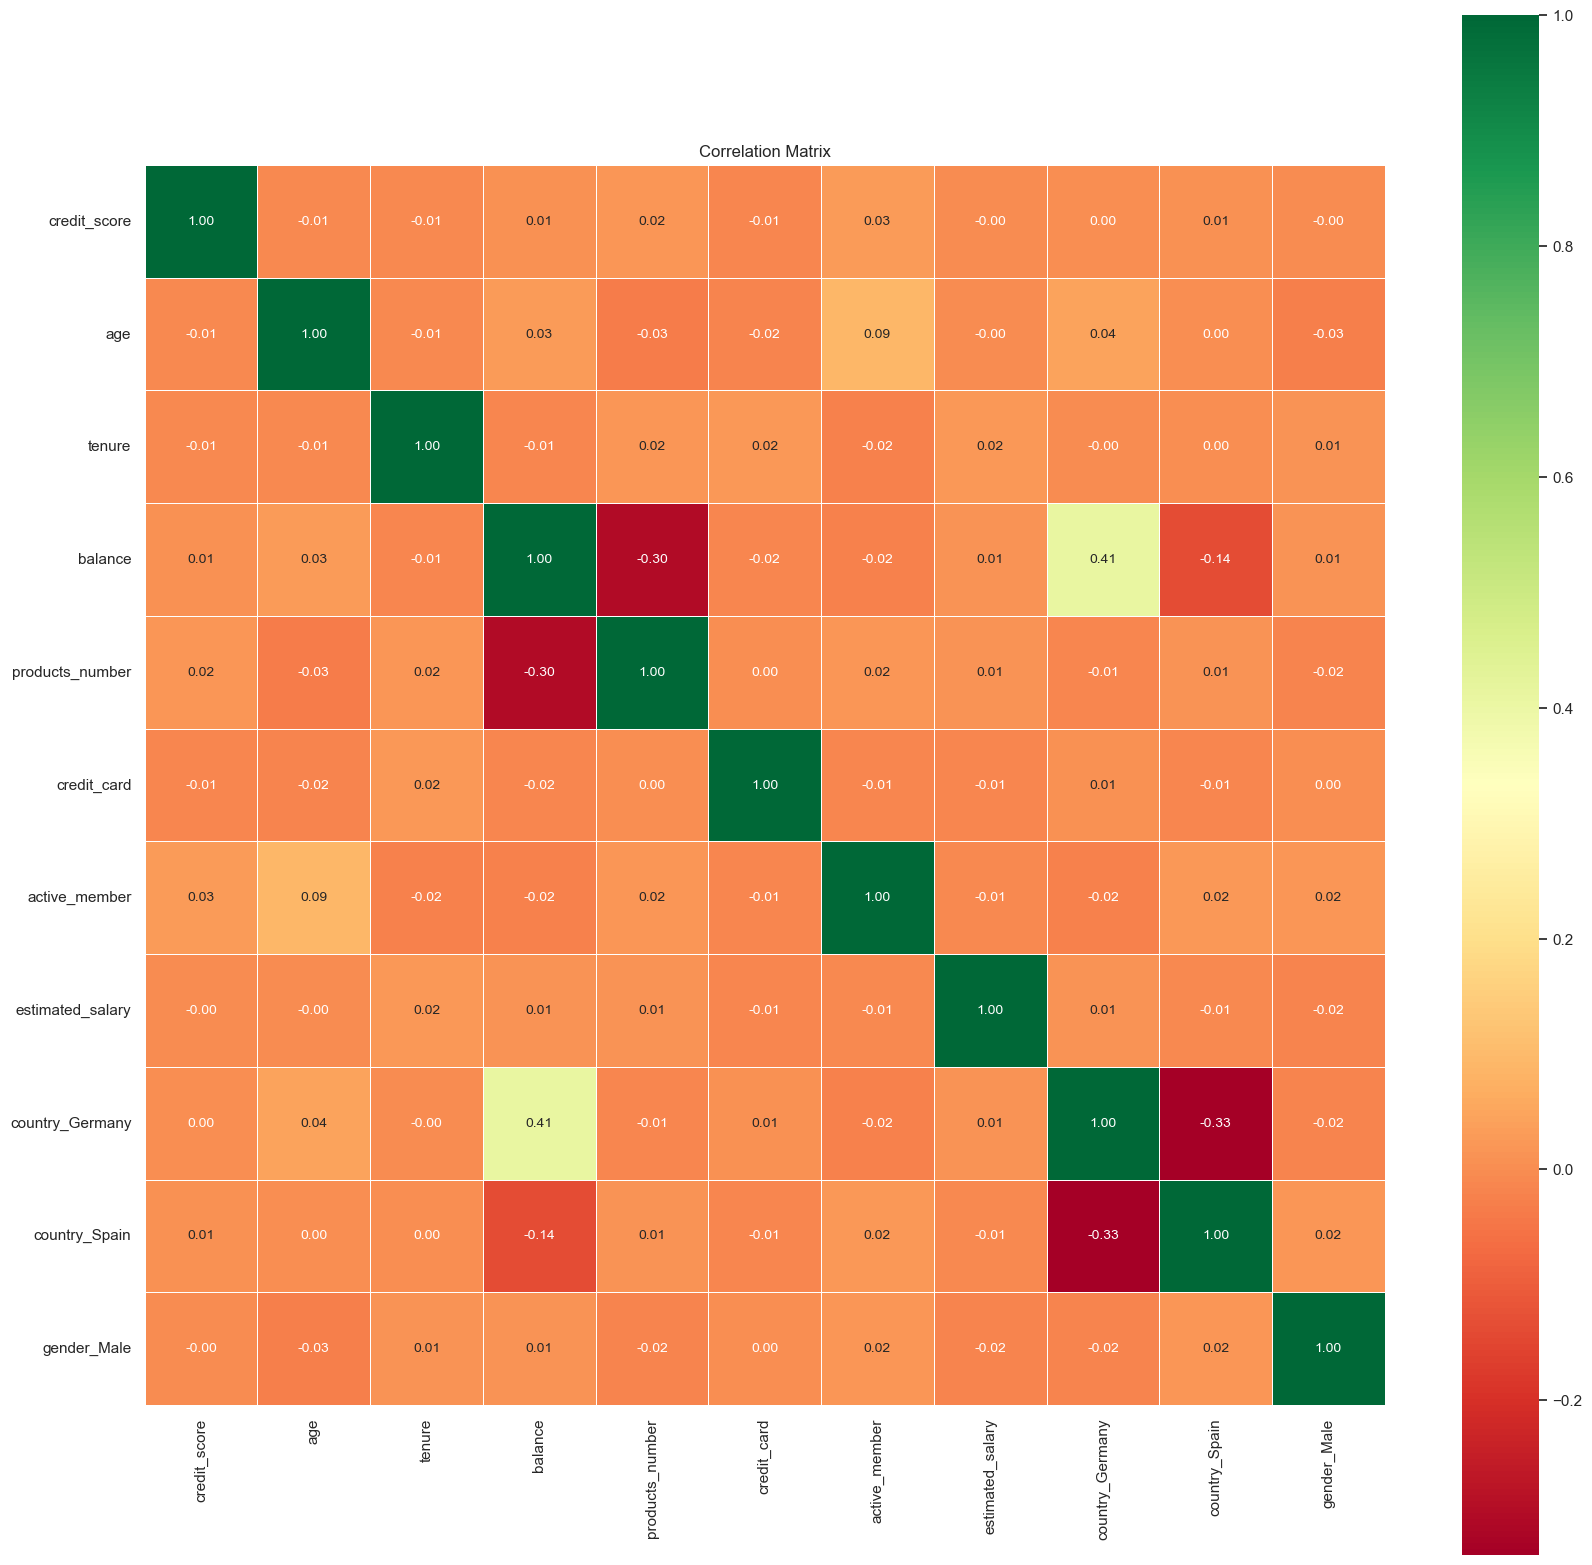

In [63]:
# Mememvisualisasi koefisien korelasi untuk melihat variabel mana yang berkorelasi tinggi

plt.figure(figsize=(20, 20))
corr = X_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, cmap="RdYlGn", annot=True, fmt=".2f", annot_kws={"size": 10}, square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [62]:
data.corr()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
credit_score,1.0000,-0.0040,0.0008,0.0063,0.0122,-0.0055,0.0257,-0.0014,-0.0271,0.0055,0.0048,-0.0029
age,-0.0040,1.0000,-0.0100,0.0283,-0.0307,-0.0117,0.0855,-0.0072,0.2853,0.0469,-0.0017,-0.0275
tenure,0.0008,-0.0100,1.0000,-0.0123,0.0134,0.0226,-0.0284,0.0078,-0.0140,-0.0006,0.0039,0.0147
balance,0.0063,0.0283,-0.0123,1.0000,-0.3042,-0.0149,-0.0101,0.0128,0.1185,0.4011,-0.1349,0.0121
products_number,0.0122,-0.0307,0.0134,-0.3042,1.0000,0.0032,0.0096,0.0142,-0.0478,-0.0104,0.0090,-0.0219
credit_card,-0.0055,-0.0117,0.0226,-0.0149,0.0032,1.0000,-0.0119,-0.0099,-0.0071,0.0106,-0.0135,0.0058
active_member,0.0257,0.0855,-0.0284,-0.0101,0.0096,-0.0119,1.0000,-0.0114,-0.1561,-0.0205,0.0167,0.0225
estimated_salary,-0.0014,-0.0072,0.0078,0.0128,0.0142,-0.0099,-0.0114,1.0000,0.0121,0.0103,-0.0065,-0.0081
churn,-0.0271,0.2853,-0.0140,0.1185,-0.0478,-0.0071,-0.1561,0.0121,1.0000,0.1735,-0.0527,-0.1065
country_Germany,0.0055,0.0469,-0.0006,0.4011,-0.0104,0.0106,-0.0205,0.0103,0.1735,1.0000,-0.3321,-0.0246


In [64]:
# Mengecek skewness dari data


churn_true_count = len(data.loc[data['churn']==1])
churn_false_count = len(data.loc[data['churn']==0])

In [66]:
# Menampilkan jumlah dari hasil churn count

(churn_true_count, churn_false_count)

(2037, 7963)

In [67]:
# Missing value pada dataset
print('total number of rows : {0}'.format(data.shape[0]))
print('total number of columns : {0}'.format(data.shape[1]))

total number of rows : 10000
total number of columns : 12


In [74]:
# Menampilkan baris nol pada tabel dataset

print('banyak baris nilai nol (0) untuk value kredit skor : {0}'.format(len(data.loc[data['credit_score']==0])))
print('banyak baris nilai nol (0) untuk value kartu kredit : {0}'.format(len(data.loc[data['credit_card']==0])))
print('banyak baris nilai nol (0) untuk value member aktif skor : {0}'.format(len(data.loc[data['active_member']==0])))
print('banyak baris nilai nol (0) untuk value churn skor : {0}'.format(len(data.loc[data['churn']==0])))


banyak baris nilai nol (0) untuk value kredit skor : 0
banyak baris nilai nol (0) untuk value kartu kredit : 0
banyak baris nilai nol (0) untuk value member aktif skor : 0
banyak baris nilai nol (0) untuk value churn skor : 7963


In [75]:
data2 = data.copy()

In [76]:
# Menampilkan rata-rata

# rata-rata
avg_credit_score = data2['credit_score'].mean()
avg_credit_card = data2['credit_card'].mean()
avg_active_member = data2['active_member'].mean()
avg_churn = data2['churn'].mean()

In [77]:
# mengganti rata-rata ke kolom
data2['credit_score'].replace({0:avg_credit_score},inplace=True)
data2['credit_card'].replace({0:avg_credit_card},inplace=True)
data2['active_member'].replace({0:avg_active_member},inplace=True)
data2['churn'].replace({0:avg_churn},inplace=True)

# Apply Model

In [79]:
from sklearn.naive_bayes import GaussianNB  

# Menginisiasikan Gaussian Naive Bayes Classifier
model = GaussianNB()

# Fitting model pada training data
model.fit(X_train, y_train)

# Prediiksi padatest data
y_pred = model.predict(X_test)

# Menghitung nilai akurasi
naive_bayes_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Gaussian Naive Bayes model:", naive_bayes_accuracy)

Accuracy of the Gaussian Naive Bayes model: 0.8335


In [80]:
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1607
           1       0.64      0.36      0.46       393

    accuracy                           0.83      2000
   macro avg       0.75      0.65      0.68      2000
weighted avg       0.81      0.83      0.81      2000



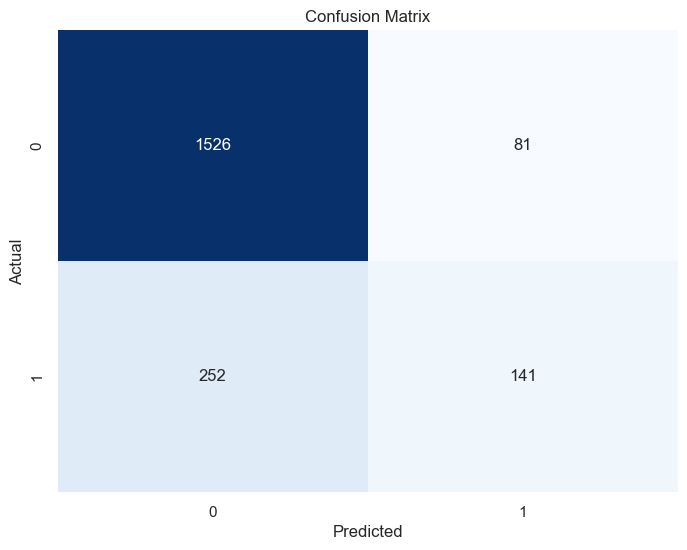

In [81]:
# Visualisasi Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [82]:
# Data training

model_accuracies_train = { 'Naive Bayes': naive_bayes_accuracy }

accuracy_data = pd.DataFrame(list(model_accuracies_train.items()), columns=['Model Name', 'Accuracy'])

accuracy_data = accuracy_data.sort_values(by='Accuracy', ascending=False)

accuracy_data

,Model Name,Accuracy
0,Naive Bayes,0.8335
